In [1]:
#Quiero calcular el valor de una integral 

#Definamos la función: 

#Importemos las librerias necesarias necesarias.

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

#Definamos la función a integrar
def alpha(t,T,omega_l,omega_0):
    return (np.sin(np.pi*t/T)**2)*np.cos(omega_l*t-T/2)*np.exp(1j*omega_0*t)

#Definamos los parámetros de la función
T=16*np.pi
omega_l=0.5
omega_0=0.5
t=np.linspace(0,T,1000)

#Integremos y mostremos el valor para cada valor de t
I=integrate.quad(alpha,0,T,args=(T,omega_l,omega_0))
print(I)



(12.566370614359172, 5.43453105295022e-08)


/home/luis/.local/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


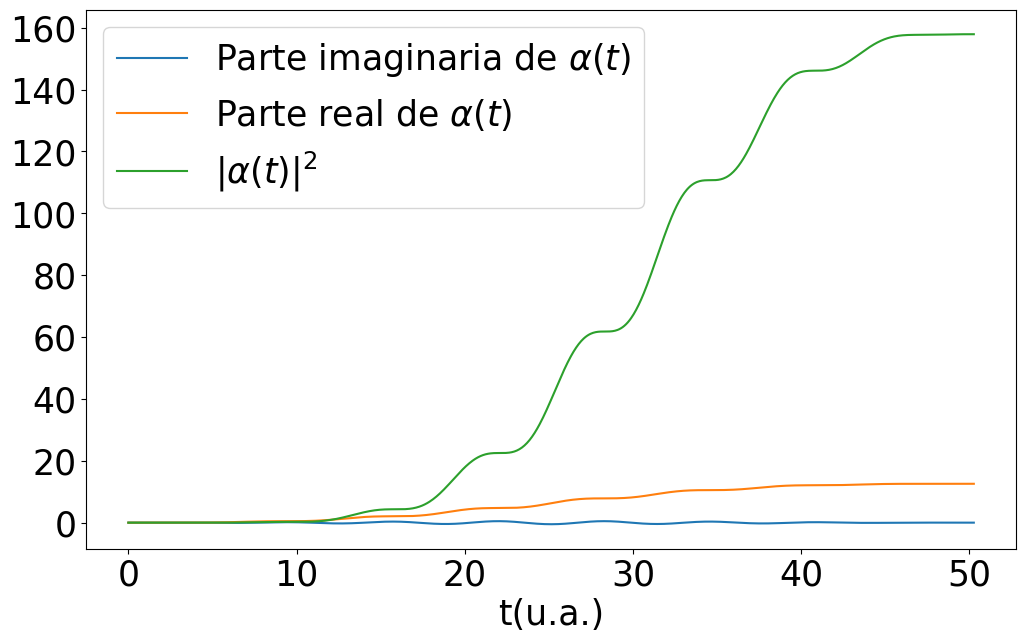

In [12]:
#Resolovamos la integral para el valor real y el imaginario
#Importamos las librerías necesarias
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

#Definimos la función que queremos integrar
def alpha(t,T,omega_l,omega_0):
    return (np.sin(np.pi*t/T)**2)*np.cos(omega_l*(t-T/2))*np.exp(1j*omega_0*t)

def pulso(t,T,omega_l):
    return (np.sin(np.pi*t/T)**2)*np.cos(omega_l*(t-T/2))


def funct(t,T,omega_l):
    return -0.5*(np.sin(np.pi*t/T)**2)*np.cos(2*omega_l*(t-50/2))
#Definimos los parámetros de la integral
#omega_0=omega_l
T=16*np.pi



#Definimos el intervalo de integración
t=np.linspace(0,T,1000)
#Definimos el valor de la integral
integral_value_prueba=quad(alpha,0,T,args=(T,omega_l,omega_0),complex_func=True)[0]


#abs(integral_value)
#Ahora calculemos el valor de la integral para cada valor del intervalo t
integral_values=[]
integral_values_imag=[]
integral_values_real=[]
integral_values_abs=[]
for i in range(len(t)):
    integral_values.append(quad(alpha,0,t[i],args=(T,omega_l,omega_0),complex_func=True)[0])
    integral_values_abs.append(abs(integral_values[i])**2)

#Ahora separamos la parte real de la parte imaginaria
for i in range(len(integral_values)):
    integral_values_imag.append(integral_values[i].imag)
    integral_values_real.append(integral_values[i].real)

#Graficamos la parte real e imaginaria de la integral
plt.figure(figsize=(12,7))
#plt.title(r'Valor de la integral $\alpha(t)$',fontsize=25)
plt.plot(t,integral_values_imag,label=r'Parte imaginaria de $\alpha(t)$')
plt.plot(t,integral_values_real,label=r'Parte real de $\alpha(t)$')
plt.plot(t,integral_values_abs,label=r'$|\alpha(t)|^{2}$')
#plt.plot(t,pulso(t,T,omega_l),label='pulso')
#plt.plot(t,funct(t,T,omega_l),label='funcion')
#plt.plot(t,integral_values_abs,label='Absoluto')
plt.xlabel('t(u.a.)',fontsize=25)
#Cambiemos el font de los sticks 
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.ylim(-1,10)
#plt.grid()
#plt.ylabel('Valor de la integral',fontsize=25)
plt.legend(fontsize=25)
plt.show()




    

In [4]:
16*np.pi

50.26548245743669

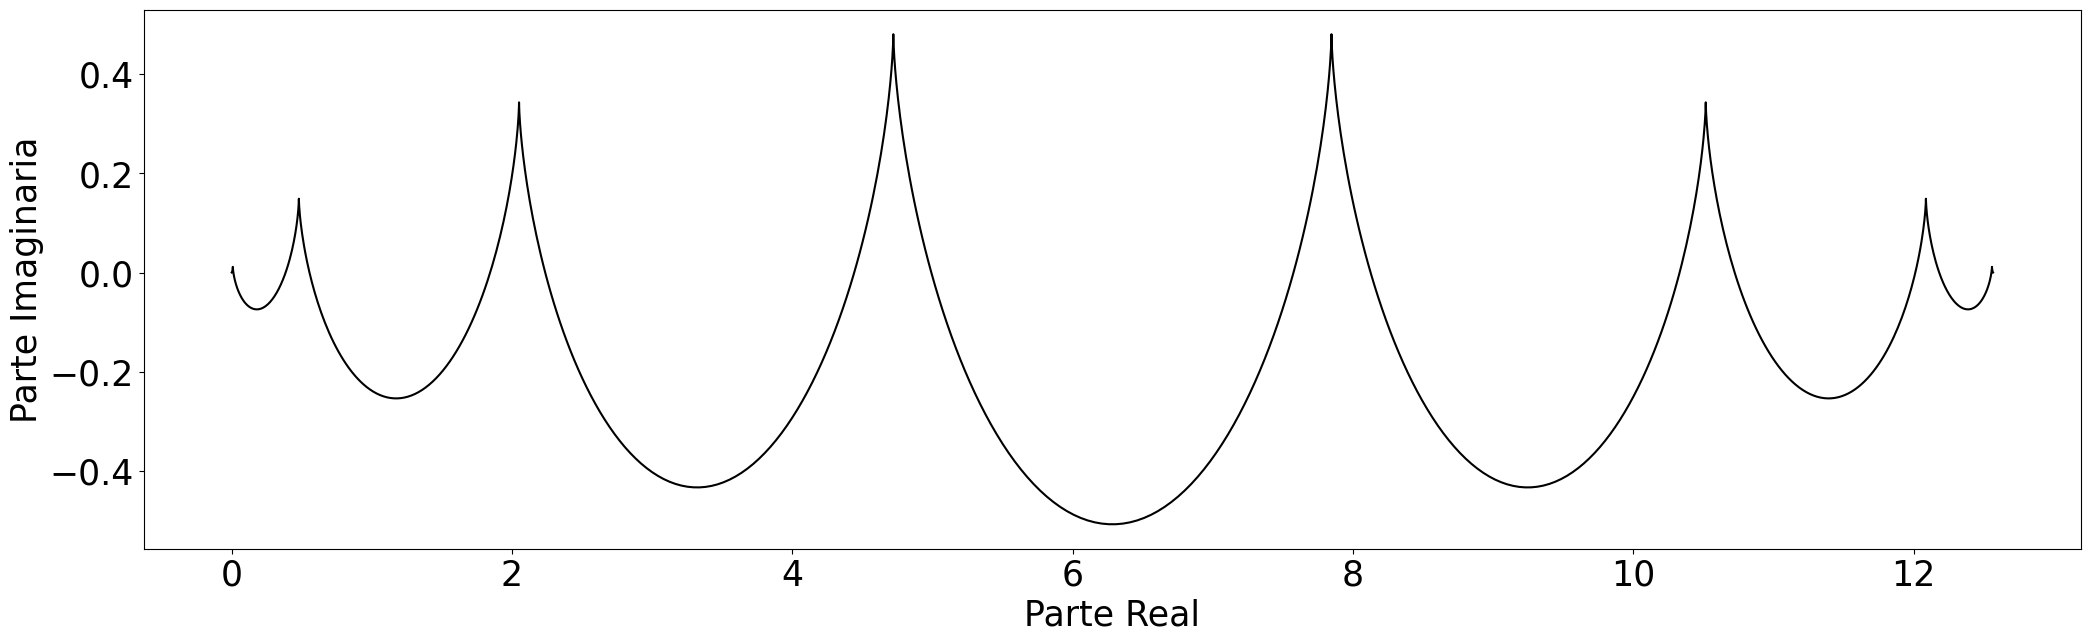

In [20]:
#Pintemos en el plano la parrte real y la imaginaria como coordenada
plt.figure(figsize=(25,7))
plt.plot(integral_values_real, integral_values_imag, '-', color='black', markersize=1.5)
plt.xlabel('Parte Real', fontsize=25)
#plt.xlim(-1,1)
#plt.ylim(-2,0)
plt.ylabel('Parte Imaginaria', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.title(r'Integral para $\alpha$ de un estado coherente', fontsize=20)

plt.show()


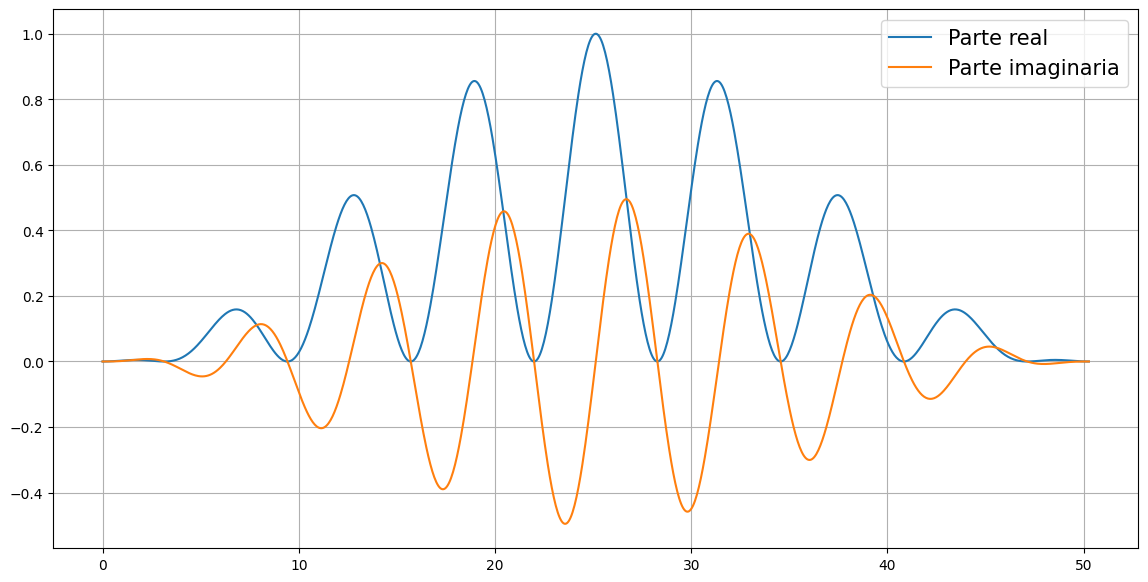

In [6]:
def parte_real(t):
    return (np.sin(np.pi*t/T)**2)*np.cos(omega_l*(t-T/2))*np.cos(omega_l*t)

def parte_imaginaria(t):
    return (np.sin(np.pi*t/T)**2)*np.sin(omega_l*(t-T/2))*np.sin(omega_l*t)

def parte_real2(t):
    return (np.sin(np.pi*t/T)**2)*0.5*((np.cos(omega_l*T/2)*(np.cos(2*omega_l*t)+1))+np.sin(omega_l*T/2)*(np.sin(2*omega_l*t)))

def parte_imaginaria(t):
    return (np.sin(np.pi*t/T)**2)*np.cos(omega_l*(t-T/2))*np.sin(omega_l*t)


def parte_real3(t):
    return (np.sin(np.pi*t/T)**2)*0.5*np.cos(omega_l*T/2)*(np.cos(omega_l*t)**2 - np.sin(omega_l*t)**2)
#Pintemos la función

plt.figure(figsize=(14,7))
plt.plot(t, parte_real(t), label='Parte real')
plt.plot(t, parte_imaginaria(t), label='Parte imaginaria')

#plt.plot(t, parte_imaginaria(t), label='Parte imaginaria')
#plt.plot(t, parte_real2(t), label='Parte real 2')
#plt.plot(t, parte_real3(t), label='Parte real 3')
plt.grid()
plt.legend(fontsize=15)
plt.show()



## Hasta aquí hemos visto el comportamiento del número promedio de fotones cuando sosideramos el pulso sin apróximación de onda rotante. Veamos que sucede cuando la consideramos, lo cual seria considerar una onda plana y comparemos como se da y como cambia la generación de fotones en el sistema.

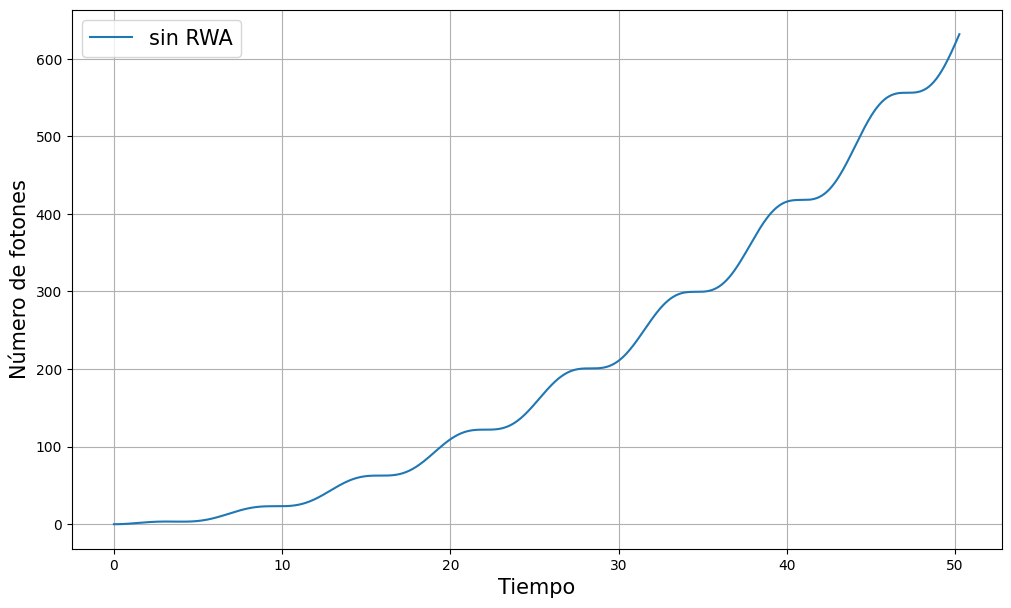

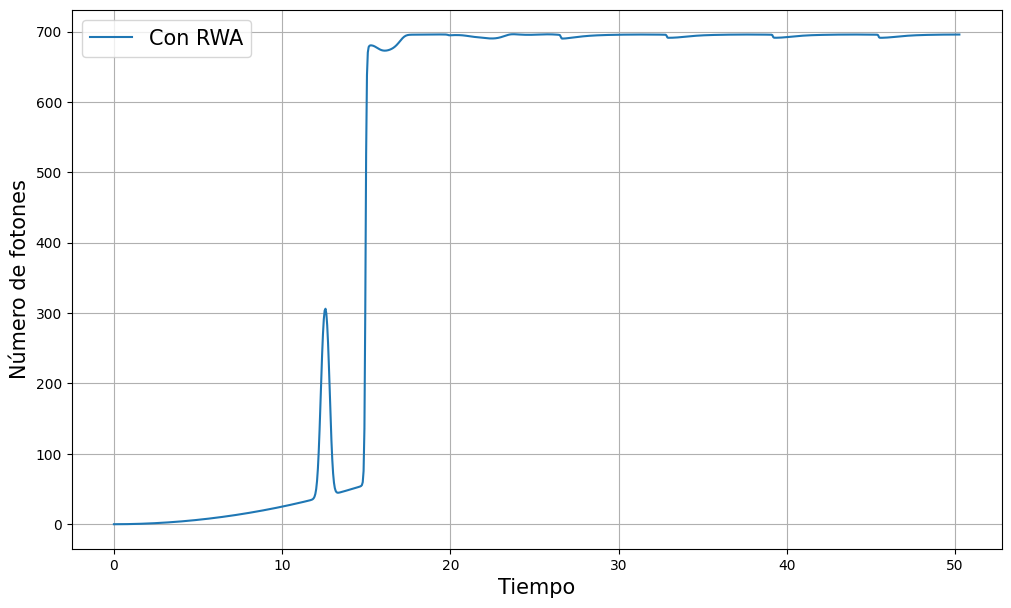

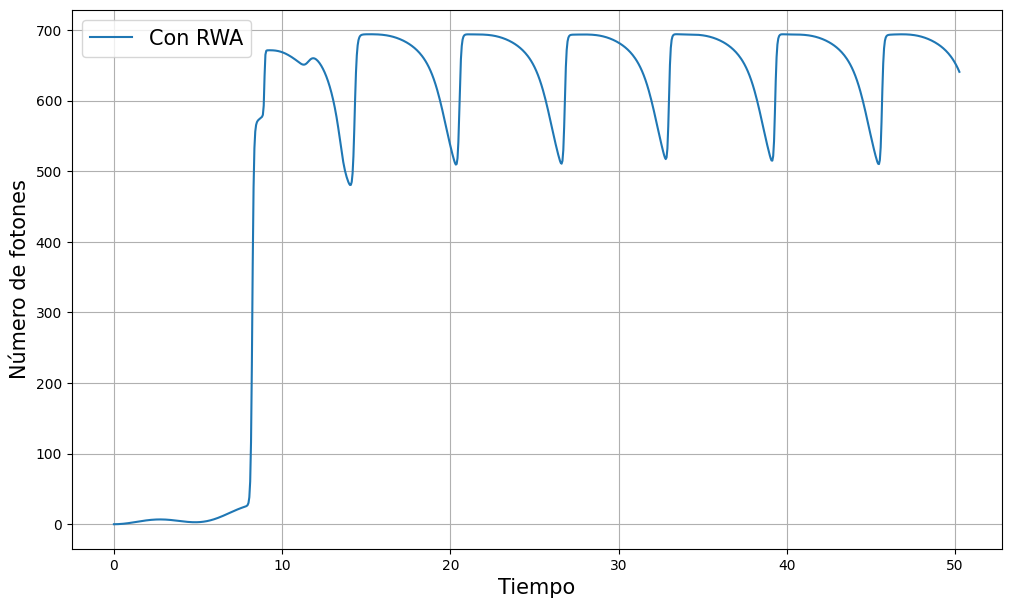

In [7]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy import *

# Definimos las constantes necesarias
hbar = 1.0
omega_l = 0.5
omega_r = 0.5
omega_0 = 0.5
mu=0.5
E0=1
T=8*np.pi*2


# Definimos el tiempo discreto
num_steps = 1000
t = np.linspace(0, T, num_steps)

# Definimos la funcion que nos da el pulso
def pulso(t, args): #Sin aproximación de onda rotante
    return E0*np.exp(1j*omega_0*t) * np.cos(omega_l * (t))

def pulso2(t): #Sin aproximación de onda rotante para dibujar
    return E0* np.cos(omega_l * (t-T/2))

#Definamos un puso de onda plana
def pulso_plano(t,args):
    return E0*np.cos(omega_l * (t-T/2))

#Ahora con argumento negativo
def pulso_plano2(t,args):
    return E0*np.exp(-1j*omega_l*(t-T/2))/2

def pulso_plano3(t,args):
    return E0*np.exp(1j*omega_l*(t-T/2))+np.exp(-1j*omega_l*(t-T/2))/2

N1 = 700
a = destroy(N1)
ad = create(N1)

# Definimos el Hamiltoniano cero atómico con sigma_z como operador de Pauli
H0 = (ad*a+0.5)*omega_0


# Definimos el operador ( sigma_+ + sigma_- )
HI = (a + ad)

#Definamos el hamiltoniano total
H = [H0, [HI, pulso_plano]]
H2 = [H0, [HI, pulso_plano2]]
H3 = [H0, [HI, pulso_plano3]]

# Definimos el estado inicial
psi0 = basis(N1, 0)
psi01=basis(N1,100)

# Calculamos la evolucion temporal
result1 = mesolve(H, psi0, t, [], [ad*a])
result2=mesolve(H2, psi0, t, [], [ad*a])
result3=mesolve(H3, psi0, t, [], [ad*a])




# Graficamos el resultado
plt.figure(figsize=(12,7))
plt.plot(t, result1.expect[0], label=r'sin RWA')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()


plt.figure(figsize=(12,7))

plt.plot(t, result2.expect[0], label=r'Con RWA')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.figure(figsize=(12,7))

plt.plot(t, result3.expect[0], label=r'Con RWA')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Número de fotones', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()




In [8]:
result1.expect[0]

array([0.00000000e+00, 2.53101196e-03, 1.01160304e-02, 2.27310575e-02,
       4.03361923e-02, 6.28757735e-02, 9.02785777e-02, 1.22458073e-01,
       1.59312726e-01, 2.00726362e-01, 2.46568575e-01, 2.96695197e-01,
       3.50948805e-01, 4.09159289e-01, 4.71144451e-01, 5.36710662e-01,
       6.05653550e-01, 6.77758736e-01, 7.52802601e-01, 8.30553089e-01,
       9.10770547e-01, 9.93208584e-01, 1.07761497e+00, 1.16373254e+00,
       1.25130014e+00, 1.34005357e+00, 1.42972658e+00, 1.52005179e+00,
       1.61076174e+00, 1.70158983e+00, 1.79227135e+00, 1.88254444e+00,
       1.97215109e+00, 2.06083810e+00, 2.14835808e+00, 2.23447035e+00,
       2.31894190e+00, 2.40154827e+00, 2.48207449e+00, 2.56031585e+00,
       2.63607881e+00, 2.70918173e+00, 2.77945567e+00, 2.84674505e+00,
       2.91090837e+00, 2.97181884e+00, 3.02936493e+00, 3.08345093e+00,
       3.13399744e+00, 3.18094177e+00, 3.22423836e+00, 3.26385907e+00,
       3.29979346e+00, 3.33204900e+00, 3.36065123e+00, 3.38564383e+00,
      